In [3]:
#!pip install --user graphviz 
#!apt-get install graphviz

  Using cached https://files.pythonhosted.org/packages/1f/e2/ef2581b5b86625657afd32030f90cf2717456c1d2b711ba074bf007c0f1a/graphviz-0.10.1-py2.py3-none-any.whl


# Drzewa klasyfikacyjne (metoda rekurencyjnego podziału)

Metoda ta polega na sekwencyjnym (rekurencyjnym) podziale przestrzeni danych na podprzestrzenie (hiperkostki,segmenty), aż zmienna zależnao siągnie w każdej podprzestrzeni minimalny poziom zróżnicowania.


## Wady i zalety drzewa decyzyjnego
**Zalety:**

1. *niezparametryczność* – przy budowaniu modelu nie zakłada się postaci rozkładów zmiennych ani relacji między nimi
2. *adaptacyjność* – automatyczny proces doboru zmiennych do modelu, możliwość uwzględnieniem zarówno zmiennych jakościowych i ilościowych,
3. *odporność na braki danych oraz występowanie wartości
nietypowych* 
4. *łatwa interpretowalność* -  możliwość graficznego przedstawienia modelu w postaci drzewa, możliwość zapisania reguł klasyfikujących

**Główna wada:**

1. *niestabilność modelu* -  oznacza, że postać modelu silnie zależy od dostępnego zbioru uczącego, budowanie drzew na różnych podzbiorach trenujących daje bardzo różniące się modele

## Algorytm tworzenia drzewa klasyfikującego

**Kroki algorytmu**

Mając treningory zbiór obiektów $S$, sprawdź, czy należą one do tej samej klasy. Jeżli
tak, to zakończ pracę.
2. W przeciwnym przypadku rozważ wszystkie możliwe podziały zbioru S na
podzbiory $S_1$, $S_2$, ..., $S_m$ tak, aby były one jak najbardziej jednorodne.
3. Dokonaj oceny jakości każdego z tych podziałów zgodnie z przyjętym kryterium
i wybierz najlepszy z nich.
4. Podziel zbiór $S$ w wybrany sposób.
5. Wykonaj kroki 1-4 rekurencyjnie dla każdego z podzbiorów

W domyślnej wersji algorytmu każdorazowo poszukiwany jest najlepszy podział pod względem zmiennej jak i sposobu podziału przestrzeni względem niej. To domyślne działanie można jednak zmienić, o czym powiemy za chwilę. 


## Kryterium podziału 
Domyślnie kryterium podziały jest minimalizacja zróżnicowania (heterogeniczności) elementów w każdym z podziałów. W powyższym przykładzie wykorzystywany jest wskaźnik Giniego.


W pierwszej kolejności dla każdej z $K$ klas ($k \in K$) dla każdego z $M$ podobszarów ($m \in M$) wyznaczana jest średnia ilość elementów danej klasy w tym obszarze:

$$p_{km} = \frac{1}{N_s}\sum_{x_i \in S_m}I(y_i=k)$$

$N_s$ to ilość elementów w danym obszarze.

Współczynnik Giniego definiujemy jako:
$$H(m) = \sum_k p_{km}(1-p_{km})$$

Gdy w danym obszerze występują tylko reprezentanci jednej klasy $p_{km}=1$ dla tej wybranej klasy. Dla pozostałych klas współczynnik ten wynosi 0. Wówczas $H=0$ dla takiego obszaru.


### Klasyfikacja z wykorzystaniem metody rekurencyjnego podziału dla danych $iris$

W pierwszym kroku importujemy przydatne biblioteki. Drzewa klasyfikacyjne zostały zaimplementowane w bibliotece $sklearn$.

In [1]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#from sklearn import tree
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split

Biblioteka $graphviz$ będzie przydatna do wizualizacji otrzymanych drzew.

In [2]:
import graphviz 
import numpy as np
import matplotlib.pyplot as plt


#### Zestaw danych IRIS

Informacje o kwiatech o polskiej nazwie **kosaciec**  dostępne w zestawie *Iris* zostały zebrane przez  biologa Ronalda Fishera w roku 1936. Wykorzystał on je w pracy  *The use of multiple measurements in taxonomic problems*.

#### Iris Setosa
![alt text](https://i.ebayimg.com/images/g/xEgAAOSwoBtW6BoO/s-l1600.jpg)
#### Iris Virginica
![alt text](https://plants.ces.ncsu.edu/media/images/Iris-virginica--Justin-Meissen--CC-BY-SA.jpg)
#### Iris Versicolor
![alt text](http://latour-marliac.com/323-large_default/iris-versicolor-iris-versicolore.jpg)


Dla reprezentantów poszczególnych  gatunków mierzono długość i szerokość płatka „petal” i działki kielicha kwiatu „sepal”.

**Krok 1:** Podziel dane na dane treningowe i testowe w proporcji 0.77 do 0.33. Ustaw random_state na 1.

In [3]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**Krok 2:** Trening klasyfikatora  `DecisionTreeClassifier` z biblioteki `sklearn`




In [10]:
%%time

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.6 ms


**Krok 2.1:** Podgląd otrzymanego drzewa decyzyjnego

*wersja czarno-biała* 

In [6]:
dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

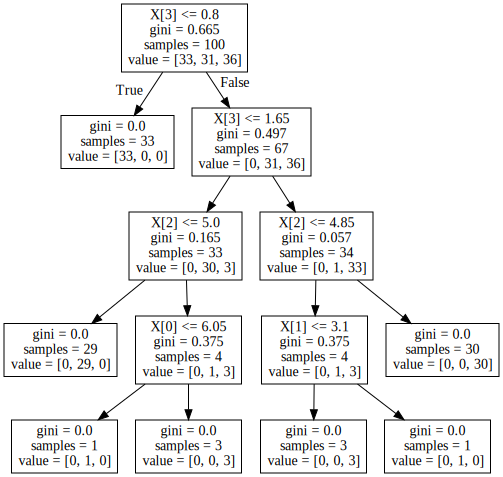

In [7]:
graph

*wersja kolorowa* 

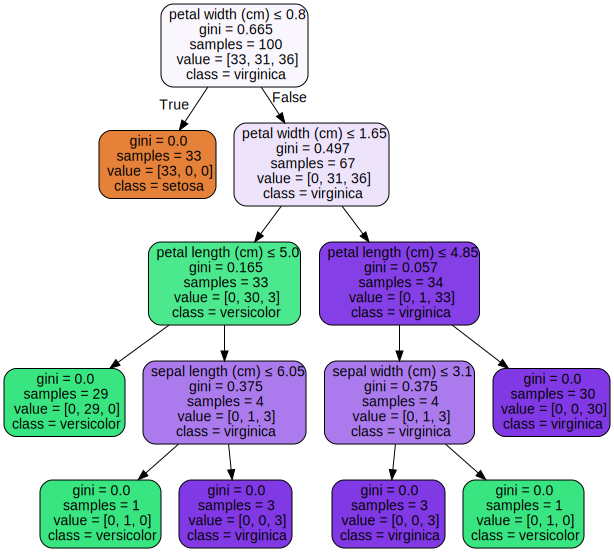

In [11]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Do jakiej klasy został przypożądkowany irys z zestawu testowego X_test[10]. Podaj nazwę.

In [16]:
iris.target_names[clf.predict([X_test[10]])[0]]

'versicolor'

## Dokładność modelu

Metodą $score$ wyznacz dokładność otrzymanego modelu

In [17]:
clf.score(X_test, y_test)

0.96

## Podgląd otrzymanych podziałów

Aby można było zwizualizować otrzymane podziały konieczna jest redukcja przestrzeni cech do dwóch wymirów. Oznacza to, że podczas klasyfikacji uwzględniamy tylko 2 zmienne objaśniające.

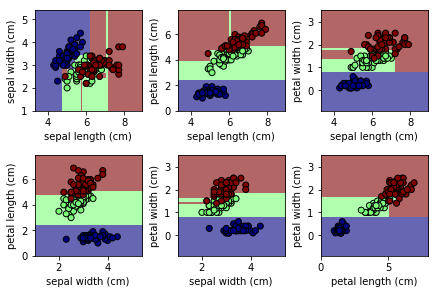

In [18]:
# Parametry
n_classes = 3
plot_step = 0.02


plt.set_cmap(plt.cm.jet)


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
  
    # Uczymy klasyfikator tylko na 2 cechach
    X = iris.data[:, pair]
    y = iris.target

    clf_tmp = DecisionTreeClassifier().fit(X, y)

    # Wykres
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf_tmp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.imshow(Z,extent=[x_min,x_max,y_min,y_max],origin='lower',alpha=0.6)
    plt.scatter(X[:,0], X[:,1],c=np.ravel(y),edgecolors='black')

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")


    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.grid(False)

plt.show()


## Inne opcje poszukiwania najlepszego podziału

Kiedy mamy zbyt dużo danych lub zmiennych objaśniających czas poszukiwania optymalnego podziału rośnie. Aby w każdym kroku nie przeszukiwać wszystkich możliwych podziałów mamy dwie możliwości. Możliwe ustawienia:

### `max_features`

Ilość zmiennych uwzględnianych w czasie poszukiwania optymalnego podziału. Możliwe opcje:
*  liczba całkowita - uwzględnia dokładnie tyle ziennych podczas każdego podziału
*  liczba zmiennoprzecinkowa - tyle procent zmiennych będzie uwzględnianych
*  “auto” -  wówczas `max_features=sqrt(n_features)`.
*  “sqrt” - wówczas `max_features=sqrt(n_features)`
*  “log2” - wówczas `max_features=log2(n_features)`.
*  `None` - wówczas `max_features=n_features`.


In [62]:
clf_all = DecisionTreeClassifier()
clf_all = clf_all.fit(X_train, y_train)

print(clf_all.score(X_test, y_test), clf_all.score(X_train, y_train))


clf = DecisionTreeClassifier(max_features=1, random_state=123)
clf = clf.fit(X_train, y_train)

print(clf.score(X_test, y_test), clf.score(X_train, y_train))

0.96 1.0
0.88 1.0


### splitter='random':

W tym przypadku wybór zmiennej względem której dokonywany jest podział będzie losowy.

In [64]:
%%time

clf = DecisionTreeClassifier(splitter='random', random_state=123)
clf = clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.29 ms


In [65]:
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.94, 1.0)

### Powównanie 2 podziałów dla różnej inicjalizacji generatora liczb pseudolosowych

No handles with labels found to put in legend.


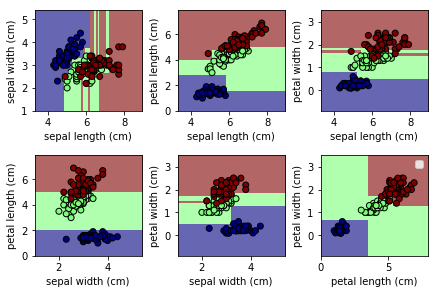

In [67]:

# Parametery
n_classes = 3
plot_step = 0.02

plt.set_cmap(plt.cm.jet)


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target


    clf_tmp = DecisionTreeClassifier(splitter='random', random_state=2).fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf_tmp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.imshow(Z,extent=[x_min,x_max,y_min,y_max],origin='lower',alpha=0.6)
    plt.scatter(X[:,0], X[:,1],c=np.ravel(y),edgecolors='black')

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.grid(False)


plt.legend()
plt.show()


No handles with labels found to put in legend.


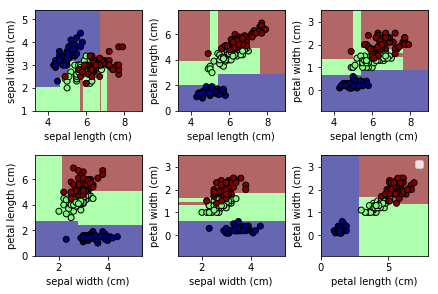

In [68]:

# Parametery
n_classes = 3
plot_step = 0.02

plt.set_cmap(plt.cm.jet)


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target


    clf_tmp = DecisionTreeClassifier(splitter='random', random_state=100).fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf_tmp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.imshow(Z,extent=[x_min,x_max,y_min,y_max],origin='lower',alpha=0.6)
    plt.scatter(X[:,0], X[:,1],c=np.ravel(y),edgecolors='black')

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.grid(False)


plt.legend()
plt.show()


## Przeciwdziałanie przeuczeniu

Wymuszanie jednorodności w otrzymanych podprzestrzeniach prowadzi na ogół do zbudowaniabardzo złożonego modelu, który jest nadmiernie dopasowany dodanych ze zbioru uczącego. POjawia się wówczas efekt przeuczenia.

Następujące parametry pozwalają zmniejszyć efekt *overfittingu*. Po znaku równości zostały podane ich domyślne wartości.

*   `max_depth=None`
*   `min_samples_split=2`
*   `min_samples_leaf=1`
*  `min_impurity_decrease=0`



In [69]:
%%time

clf = DecisionTreeClassifier(min_samples_split=10)
clf = clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.41 ms


In [73]:
dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

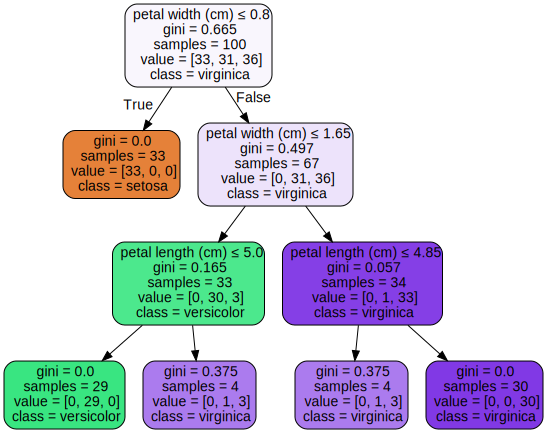

In [74]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [75]:
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.96, 0.98)

## Poszukiwanie optymalnych parametrów metodą walidacji krzyżowej

**Zapamiętaj:** danych testowych możesz użyć tylko raz do sprawdzenia dokładności ostatecznego modelu. 

Aby dopasować parametry drzewa klasyfikacyjnego można wykorzystać oddzielny zbiór walidacyjny lub **metodę walidacji krzyżowej**. W tym prykładzie użyjemy tej drugiej metody.

Metoda ta pozwala określić dokładność modelu w sposób nieobciążony. 
Algorytm metody sprawdzania krzyżowego:

1. Wybierz wartość parametru $b$ (zazwyczaj $b\leq 10$) i podziel losowo zbiór uczący $U$ na $b$ równolicznych (w przybliżeniu) i rozłącznych części $U_1$, $U_2$, . . . , $U_b$.

2.  Dla $h \in {1, . . . , b}$ wykonaj kroki:

  a. zbuduj model na zbiorze $U|U_h$ (wyłączając jedną część),

  b.  oszacuj błąd klasyfikacji modelu na zbiorze $U_h$ (wykorzystując $U_h$ jako zbiór walidacyjny).

3. Wyznacz ocenę błędu klasyfikacji modelu uśredniając wartości otrzymane w kroku 2. Otrzymany wynik jest nieobciążonym estymatorem błędu klasyfikacji

Biiblioteka `sklearn` dostarcza metodę `GridSearchCV` do przeszukiwania przestrzeni hiperparametrów modelu z wykorzystaniem walidacji krzyżowej.


In [0]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'max_depth': np.arange(3, 7),
                  'max_features': np.arange(1, 5)}

clf_grid = GridSearchCV(DecisionTreeClassifier(), parameter_grid)

clf_grid.fit(X_train, y_train)

print ("Najlepsza dokładność {}".format(clf_grid.best_score_))
print ("Dobrane parametry: {}".format(clf_grid.best_params_))




Najlepsza dokładność 0.94
Dobrane parametry: {'max_depth': 3, 'max_features': 4}


Teraz możemy przetestować otrzymany model na danych testowych

In [0]:
clf_grid.best_estimator_.score(X_test, y_test)

0.96

# Istotność zmiennych objaśniających

Zaletą drzewa klasyfikacyjnego jest możliwość określenia istotności poszczególnych zmiennych

In [0]:
ids = np.argsort(clf_grid.best_estimator_.feature_importances_)

for i in ids[::-1]:
    print (iris.feature_names[i], clf_grid.best_estimator_.feature_importances_[i])

petal width (cm) 0.9308196108729353
petal length (cm) 0.06918038912706467
sepal width (cm) 0.0
sepal length (cm) 0.0


Dla poprzedniego modelu

In [0]:
ids = np.argsort(clf.feature_importances_)


for i in ids[::-1]:
    print (iris.feature_names[i], clf.feature_importances_[i])

petal length (cm) 0.592104014625634
petal width (cm) 0.407895985374366
sepal width (cm) 0.0
sepal length (cm) 0.0


# Zadanie

Zbuduj drzewo klasyfikacyjne dla danych dotyczących złośliwości raka piersi. Znajdź optymalne parametry i sprawdź jaka jest istotność poszczególnych zmiennych objaśniających.

**Krok 1:** Wczytanie danych i podział na dane treningowe  i testowe w proporcji $0.77:0.33$. Aby móc porównać wyniki z kolegami ustaw `random_state` na 1

In [0]:
breast = load_breast_cancer()

### Your solution
#raise NotImplementedError

X, y = breast.data, breast.target
X_train_breast, X_test_breast, y_train_breast, y_test_breast = train_test_split(X, y, test_size=0.33, random_state=1)

**Krok 2:** Medodą walidacji krzyżowej znajdź optymalne drzewo klasyfikujące:

In [0]:
parameter_grid = {'max_depth': np.arange(3, 30),
                  'max_features': np.arange(1, 30)}

### Your solution
#raise NotImplementedError


clf_grid = GridSearchCV(DecisionTreeClassifier(), parameter_grid)

clf_grid.fit(X_train_breast, y_train_breast)

print ("Najlepsza dokładność {}".format(clf_grid.best_score_))
print ("Dobrane parametry: {}".format(clf_grid.best_params_))


Najlepsza dokładność 0.9606299212598425
Dobrane parametry: {'max_depth': 20, 'max_features': 13}


**Krok 3:** Podaj dokładność modelu na danych testowych:


In [0]:
### Your solution
#raise NotImplementedError
clf_grid.best_estimator_.score(X_test_breast, y_test_breast)


0.925531914893617

**Krok 4:** Sprawdź istotność poszczególnych zmiennych

In [0]:
### Your solution
#raise NotImplementedError

ids = np.argsort(clf_grid.best_estimator_.feature_importances_)

for i in ids[::-1]:
    print (breast.feature_names[i], clf_grid.best_estimator_.feature_importances_[i])

mean concave points 0.6728849843685007
worst perimeter 0.13845715403142805
worst radius 0.06696369390246942
worst texture 0.043571915945865534
mean area 0.025844525844525842
worst smoothness 0.010515637098934591
mean texture 0.010460879508498555
worst concave points 0.009359734297077649
mean smoothness 0.005538112680969823
texture error 0.005538112680969823
area error 0.005484861597498917
worst compactness 0.005380388043260988
radius error 0.0
mean perimeter 0.0
mean compactness 0.0
mean concavity 0.0
mean symmetry 0.0
mean fractal dimension 0.0
worst fractal dimension 0.0
smoothness error 0.0
perimeter error 0.0
worst symmetry 0.0
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst area 0.0
worst concavity 0.0
mean radius 0.0


**Krok 5:** Podgląd otrzymanego drzewa

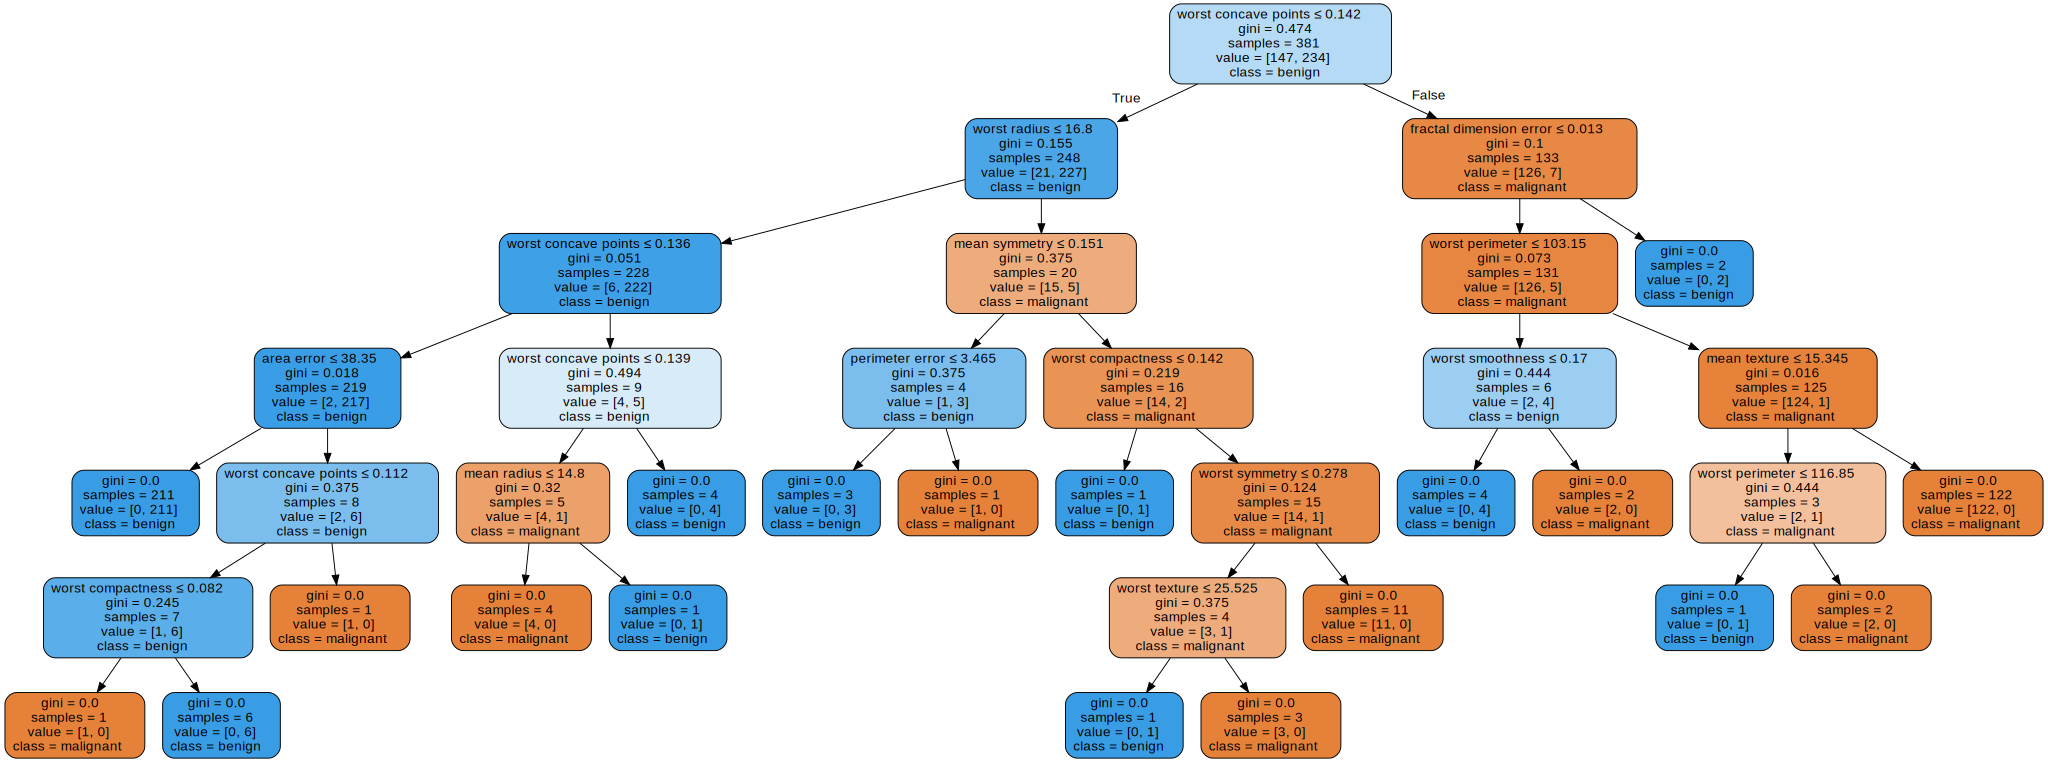

In [0]:
### Your solution
#raise NotImplementedError

dot_data = tree.export_graphviz(clf_grid.best_estimator_, out_file=None, 
                         feature_names=breast.feature_names,  
                         class_names=breast.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

**Krok 6:** Czas na zabawę! Spróbuj dopasować inne parametry i poprawić powyższy wynik.